# Lab 01 Part 01 - Greenhouse Emissions

#### Tasks:

- Exploring all possible numpy/pandas operations (min 6)

In [1]:
import pandas as pd

Importing the dataset

In [2]:
df = pd.read_csv("greenhouse_emission.csv")
df.head()

,country,total_co2,co2_per_capita,total_methane,methane_per_capita
0,Qatar,91.97 m t,31.38 t,21.45 m t,7.32 t
1,Bahrain,33.26 m t,19.02 t,17.41 m t,9.96 t
2,Kuwait,92.65 m t,21.40 t,24.71 m t,5.71 t
3,Turkmenistan,72.87 m t,11.91 t,80.48 m t,13.15 t
4,United Arab Emirates,188.86 m t,18.90 t,49.80 m t,4.98 t


Checking general information about the dataset (null values, datatypes ,etc)

In [3]:
df.describe()

,country,total_co2,co2_per_capita,total_methane,methane_per_capita
count,102,102,102,102,102
unique,102,102,98,101,82
top,Qatar,91.97 m t,4.24 t,80.48 m t,0.88 t
freq,1,1,2,2,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country             102 non-null    object
 1   total_co2           102 non-null    object
 2   co2_per_capita      102 non-null    object
 3   total_methane       102 non-null    object
 4   methane_per_capita  102 non-null    object
dtypes: object(5)
memory usage: 4.1+ KB


- Removing units in every column (except country) as the unit is same for in each column (tonnes).
- Converting mega tonnes to to tonnes by multiplying by 1000000 (same for 'bn t')
- Also, converting those columns to Dtype float64

In [5]:
def convert_units(x):
    if isinstance(x, str):
        x = x.replace(',','')
        if 'm' in x:
            x = float(x.replace('m', '')) * 1000000
        elif 'bn' in x:
            x = float(x.replace('bn', '')) * 1000000000
    return x

df.iloc[:,1:] = df.iloc[:,1:].applymap(lambda x: x.replace('t', ' ')).applymap(convert_units)
df


,country,total_co2,co2_per_capita,total_methane,methane_per_capita
0,Qatar,91970000.0,31.38,21450000.0,7.32
1,Bahrain,33260000.0,19.02,17410000.0,9.96
2,Kuwait,92650000.0,21.40,24710000.0,5.71
3,Turkmenistan,72870000.0,11.91,80480000.0,13.15
4,United Arab Emirates,188860000.0,18.90,49800000.0,4.98
...,...,...,...,...,...
97,Congo (Dem. Republic),3210000.0,0.03,34930000.0,0.38
98,Liberia,1180000.0,0.23,370000.00,0.07
99,Malawi,1450000.0,0.07,3950000.0,0.20
100,Rwanda,1330000.0,0.10,1880000.0,0.14


In [6]:
temp_df = df.iloc[:,1:]
s = temp_df.select_dtypes(include='object').columns
print(s)
df[s] = df[s].astype("float64")
df.info()

Index(['total_co2', 'co2_per_capita', 'total_methane', 'methane_per_capita'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             102 non-null    object 
 1   total_co2           102 non-null    float64
 2   co2_per_capita      102 non-null    float64
 3   total_methane       102 non-null    float64
 4   methane_per_capita  102 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.1+ KB


Finding correlation between total CO2 and total methane

In [7]:
df[['total_co2', 'total_methane']].corr().iloc[0, 1].round(5)

0.88214

Finding total CO2:total methane for each country and attachning to main dataframe.
Also sorting by the new field

In [8]:
df['co2_methane_ratio'] = df['total_co2'] / df['total_methane']
df = df.sort_values('co2_methane_ratio')
df

,country,total_co2,co2_per_capita,total_methane,methane_per_capita,co2_methane_ratio
73,Chad,2.250000e+06,0.13,52720000.00,3.12,0.042678
97,Congo (Dem. Republic),3.210000e+06,0.03,34930000.00,0.38,0.091898
65,Timor-Leste,6.200000e+05,0.46,5010000.00,3.73,0.123752
5,Grenada,3.300000e+05,2.92,2040000.00,18.05,0.161765
93,Ethiopia,1.836000e+07,0.16,84140000.00,0.71,0.218208
...,...,...,...,...,...,...
20,Bermuda,6.123890e+05,9.59,30959.96,0.48,19.780032
6,New Caledonia,5.330000e+06,19.54,214726.32,0.79,24.822295
17,South Korea,6.107900e+08,11.80,22700000.00,0.44,26.907048
25,Japan,1.080000e+09,8.61,27380000.00,0.22,39.444850


- Finding total greenhouse emissions per country
- Finding biggest producers (countries) of greenhouse emissions 

In [9]:
total_greenhouse_emission = (df['total_co2'] + df['total_methane'])
total_greenhouse_emission.name = 'total_greenhouse_emission'
pd.concat([df['country'],total_greenhouse_emission],axis=1).sort_values('total_greenhouse_emission',ascending=False)

,country,total_greenhouse_emission
31,China,1.189000e+10
12,United States,5.564510e+09
79,India,3.116650e+09
13,Russia,2.384300e+09
25,Japan,1.107380e+09
...,...,...
101,Burundi,2.070000e+06
70,Malta,1.880000e+06
98,Liberia,1.550000e+06
20,Bermuda,6.433490e+05


# Lab 01 Part 02 - Video Game Sales

Tasks:

- Exploring all possible numpy/pandas operations (min 6)

Opening the dataset

In [10]:
df = pd.read_csv('vgsales.csv')

Preliminary analysis

In [11]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None
               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.8

It can be concluded, that from a realistic perspective, the sale numbers are in millions

Checking for null values as count of 'Year' field is lower than count of other fields

In [12]:
df['Year'].isna().sum()

271

Some values in the 'Year' field are missing. For the missing year values, I will replace them with the mean of the games released on same platform. 

In [13]:
platform_mean_rank = df.groupby('Platform')['Year'].mean().round()
df['Year'] = df.apply(lambda row: platform_mean_rank[row['Platform']] if pd.isnull(row['Year']) else row['Year'], axis=1)
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Trying to estimate which year range of games does the dataset covers

In [14]:
print('Estimated upper bound where the dataset stops collecting entries: ' , df['Year'].max())
print('Estimated lower bound where the dataset stops collecting entries: ' , df['Year'].min())

Estimated upper bound where the dataset stops collecting entries:  2020.0
Estimated lower bound where the dataset stops collecting entries:  1980.0


Checking region dominance based on a publisher
NA = North America
EU = Europe
JP = Japan
Other = Other countries

In [15]:
publisher_grouped = df.groupby('Publisher')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()


publisher_region_dominance = publisher_grouped.idxmax(axis=1)
publisher_region_dominance

Publisher
10TACLE Studios                 NA_Sales
1C Company                      EU_Sales
20th Century Fox Video Games    NA_Sales
2D Boy                          EU_Sales
3DO                             NA_Sales
                                  ...   
id Software                     NA_Sales
imageepoch Inc.                 JP_Sales
inXile Entertainment            EU_Sales
mixi, Inc                       JP_Sales
responDESIGN                    NA_Sales
Length: 578, dtype: object

Checking where any given publisher might have the highest chance of making bigger profits

In [16]:
(publisher_region_dominance.value_counts() / len(publisher_region_dominance)) * 100

NA_Sales    49.480969
JP_Sales    35.467128
EU_Sales    15.051903
dtype: float64

Estimating the highest sold/used platform based on number of video game sales for that platform

In [20]:
df.groupby('Platform')['Global_Sales'].max().sort_values(ascending=False)

Platform
Wii     82.74
NES     40.24
GB      31.37
DS      30.01
X360    21.82
PS3     21.40
PS2     20.81
SNES    20.61
GBA     15.85
3DS     14.35
PS4     14.24
N64     11.89
PS      10.95
XB       8.49
PC       8.11
2600     7.81
PSP      7.72
XOne     7.30
GC       7.07
WiiU     6.96
GEN      6.03
DC       2.42
PSV      2.25
SAT      1.93
SCD      1.50
WS       0.51
NG       0.25
TG16     0.14
3DO      0.06
GG       0.04
PCFX     0.03
Name: Global_Sales, dtype: float64

- Understanding if there is any correlation between global video game sales and year

- Using matplotlib and seaborn to draw a graph to make things easier to understand

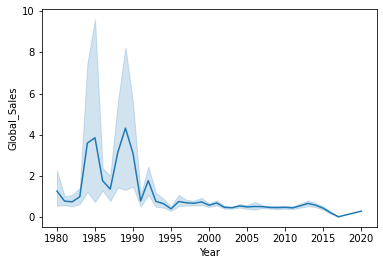

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.lineplot(x="Year",y="Global_Sales",data=df)
plt.show()